In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


data = np.array([[12, 25], [4, 33], [2, 26], [18, 16], [15, 14], [12, 26], [0, 38],
                 [9, 21], [3, 33], [6, 22], [10, 25], [8, 27], [9, 29], [4, 32],
                 [1, 32], [5, 20], [21, 10], [20, 13], [7, 25], [16, 14]])

In [17]:
from sklearn.linear_model import LinearRegression

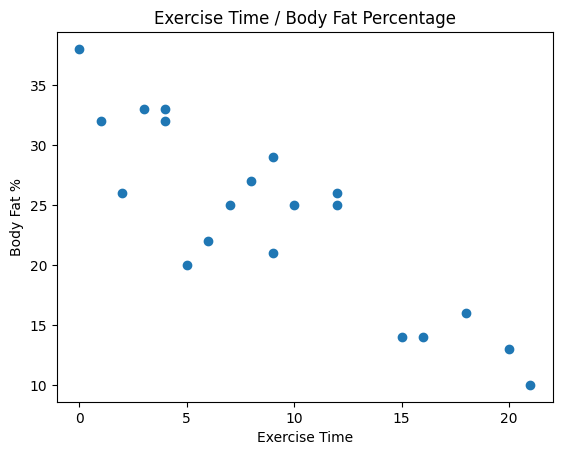

In [18]:
# a)  (Scatter plot)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Exercise Time')
plt.ylabel('Body Fat %')
plt.title('Exercise Time / Body Fat Percentage')
plt.show()

In [34]:
X = data[:, 0]
y = data[:, 1]


slope, intercept, _, _, std_err_slope = stats.linregress(X, y)# 기울기와 절편, 그리고 기울기의 표준 오차 계산

n = len(X)
x_bar = np.mean(X) #X의 평균
y_pred = slope * X + intercept #종속변수의 예측값
SE_intercept = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2)) * np.sqrt(1 / n + (x_bar ** 2) / np.sum((X - x_bar) ** 2)) # 절편의 표준 오차를 계산


print("기울기 (a):", slope)
print("절편 (b):", intercept)
print("기울기 (a) 표준편차:", std_err_slope)
print("절편 (b) 표준편차:", SE_intercept)

기울기 (a): -1.0622532245327718
절편 (b): 33.716504343248225
기울기 (a) 표준편차: 0.1440029430160775
절편 (b) 표준편차: 1.582722714107823


기울기 (a): -1.0622532245327718

절편 (b): 33.716504343248225

기울기 (a) 표준편차: 0.1440029430160775

절편 (b) 표준편차: 1.582722714107823

In [35]:
#b-1)
#운동시간 1열 체지방률 2열
X = data[:, 0].reshape(-1, 1)  # 운동시간
y = data[:, 1]  # 체지방률

# 선형회귀
model_mle = LinearRegression().fit(X, y)
a_mle = model_mle.coef_[0]  # Mean of slope (a)
b_mle = model_mle.intercept_  # Mean of intercept (b)

# 기울기 a 표준편차
_, _, _, _, std_err_a = stats.linregress(data[:, 0], data[:, 1])

# 절편 b 표준편차
y_pred = model_mle.predict(X)
n = len(X)
x_bar = np.mean(data[:, 0])
SE_b = np.sqrt(np.sum((y - y_pred)**2) / (n - 2) * (1/n + x_bar**2 / np.sum((data[:, 0] - x_bar)**2)))


print("기울기 (a) 평균:", a_mle)
print("기울기 (a) 표준편차:", std_err_a)
print("절편 (b) 평균:", b_mle)
print("절편 (b) 표준편차:", SE_b)

기울기 (a) 평균: -1.062253224532772
기울기 (a) 표준편차: 0.1440029430160775
절편 (b) 평균: 33.716504343248225
절편 (b) 표준편차: 1.5827227141078233


기울기(a) 평균: −1.06

a의 표준편차: 0.14

절편(b)의 평균: 33.72

b의 표준편차: 1.58

In [21]:
print(a_mle) #기울기a 평균
print(std_err_a)#a의 표준편차

-1.062253224532772
0.1440029430160775


In [22]:
print(b_mle)#절편b 평균
print(SE_b)#b의 표준편차

33.716504343248225
1.5827227141078233


In [23]:

X = data[:, 0].reshape(-1, 1)  # 운동시간
y = data[:, 1]  #체지방률

X_design = np.c_[X, np.ones(X.shape[0])]


prior_mean = np.array([0, 0])
prior_variance = np.array([[1, 0], [0, 1]])

# 베이지안 추정
# 후위 분산 = (prior_variance^-1 + X_design.T @ X_design)^-1
posterior_variance_inv = np.linalg.inv(prior_variance) + X_design.T @ X_design
posterior_variance = np.linalg.inv(posterior_variance_inv)

# 전위 평균 = posterior_variance * (prior_variance^-1 * prior_mean + X_design.T @ y)
posterior_mean = posterior_variance @ (np.linalg.inv(prior_variance) @ prior_mean + X_design.T @ y)

# 베이지안
a_bayes = posterior_mean[0]
b_bayes = posterior_mean[1]


print("Bayesian estimate of a (slope):", a_bayes)
print("Bayesian estimate of b (intercept):", b_bayes)
print("Variance of a:", posterior_variance[0, 0])
print("Variance of b:", posterior_variance[1, 1])

Bayesian estimate of a (slope): -0.7129813418023024
Bayesian estimate of b (intercept): 29.08393353371519
Variance of a: 0.0011909487892020642
Variance of b: 0.1370725344524471


In [24]:
#(b-2) 베이지안 추정
# a,b의 전위 normal 추정
prior_mean = np.array([0, 0])
prior_variance = np.array([[1, 0], [0, 1]])

# Design matrix
X_design = np.c_[X, np.ones(X.shape[0])]

#베이지안 추
# 후위 분산
posterior_variance_inv = np.linalg.inv(prior_variance) + X_design.T @ X_design
posterior_variance = np.linalg.inv(posterior_variance_inv)

# 후위 평균
posterior_mean = posterior_variance @ (np.linalg.inv(prior_variance) @ prior_mean + X_design.T @ y)

a_bayes = posterior_mean[0]
b_bayes = posterior_mean[1]

In [25]:
print(a_bayes) # a 평균
print(posterior_variance[0, 0]) # a 분산

-0.7129813418023024
0.0011909487892020642


In [26]:
print(b_bayes) # b 평균
print(posterior_variance[1, 1]) # b 분산

29.08393353371519
0.1370725344524471


In [30]:

X = data[:, 0]
y = data[:, 1]

# MLE
a_mle = -1.062253224532772
b_mle = 33.716504343248225

# Bayesian
a_bayes = -0.7129813418023024
b_bayes = 29.08393353371519

# MLE 사용 예측
y_pred_mle = a_mle * X + b_mle

# Bayesian 사용 예측
y_pred_bayes = a_bayes * X + b_bayes

# RMSE
rmse_mle = np.sqrt(np.mean((y - y_pred_mle) ** 2))
rmse_bayes = np.sqrt(np.mean((y - y_pred_bayes) ** 2))


print("RMSE for MLE model:", rmse_mle)
print("RMSE for Bayesian model:", rmse_bayes)

RMSE for MLE model: 3.7656700763582562
RMSE for Bayesian model: 4.5748651801440605


RMSE for MLE model: 3.7656700763582562

RMSE for Bayesian model: 4.5748651801440605

In [31]:
#(c) 선형 회귀 분석 및 RMSE
# MLE estimates
y_pred_mle = model_mle.predict(X.reshape(-1, 1))

# Bayesian estimates
y_pred_bayes = a_bayes * data[:, 0] + b_bayes

# RMSE
rmse_mle = np.sqrt(np.mean((y - y_pred_mle) ** 2))
rmse_bayes = np.sqrt(np.mean((y - y_pred_bayes) ** 2))

In [32]:
#최대우도 추정 3.7656700763582562
rmse_mle

3.7656700763582562

In [33]:
#베이지안 추정 4.5748651801440605
rmse_bayes

4.5748651801440605

(d)
운동 시간이 증가함에 따라 체지방 비율이 감소하는 경향이 있다.

MLE 모델은 독립 변수 X가 증가할 때 종속 변수 y가 더 빠르게 감소하는 것으로 추정하는 반면, 베이지안 모델은 이 감소가 덜 가파르다고 추정